In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

%matplotlib inline

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=[
    'sepal length in cm',
    'sepal width in cm',
    'petal length in cm',
    'petal width in cm',
    'class'
])

In [3]:
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [106]:
class Perceptron(object):
    """
    A simple Rosenblatt perceptron with all the basics
    components.
    """
    
    def __init__(self, learning_rate=0.01, epochs=50, verbose=False):
        """
        Set the learning rate and the number of epochs.
        """
        self.verbose = verbose
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        if(self.verbose is True):
            print("[>>>] Perceptron parameters:\n- learning rate: {}\n- # epochs: {}".format(
                self.learning_rate,
                self.epochs
            ))

    def train(self, X, y):
        """
        Starts with weights as a numpy zero array.
        """
        self.weights_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        if(self.verbose is True):
            print("[>>] Starting training routine:\n- initial weights: {}\n- initial errors: {}".format(
                self.weights_,
                self.errors_
            ))
            print("- train set (X): {}\n- train set (y): {}\n---".format(
                X,
                y
            ))

        for _ in range(self.epochs):
            errors = 0
            
            if(self.verbose is True):
                print("[>>] Entering epoch {}\n- weights: {}\n- errors: {}".format(
                    _,
                    self.weights_,
                    self.errors_
                ))
            
            for xi, target in zip(X, y):
                if(self.verbose is True):
                    print("[!] Learning xi = {} (target {})".format(xi, target))
                
                output = self.predict(xi)
                update = self.learning_rate * (target - output)
                
                if(self.verbose is True):
                    print("[!] {} = {}({} - {})".format(
                        update,
                        self.learning_rate,
                        target,
                        output
                    ))
                    print("[<] weights was {}".format(self.weights_))
                
                self.weights_[0] += update  # bias
                
                self.weights_[1:] += update * xi
                
                if(self.verbose is True):
                    print("[>] weights are now {}".format(self.weights_))
                
                errors += int(update != 0.0)
                
                if(self.verbose is True):
                    print("-")
                
            self.errors_.append(errors)
            
            if(self.verbose is True):
                print("--")
        
        
        return self

    def net_input(self, X):
        dp = np.dot(X, self.weights_[1:]) + self.weights_[0]
        
        if(self.verbose is True):
            print("[!] Aggregation ({} and {}) + weight {} = {}".format(
                X,
                self.weights_[1:],
                self.weights_[0],
                dp
            ))
        return dp

    def predict(self, X):
        net_input = np.where(self.net_input(X) >= 0.0, 1, -1)
        
        if(self.verbose is True):
            print("[?] Should fire? (is >= 0): {}".format(
                net_input
            ))
        
        return net_input

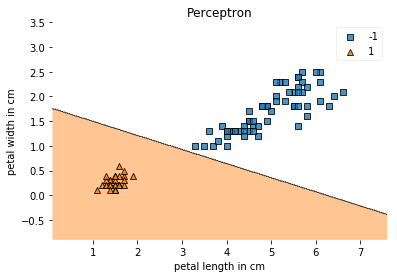

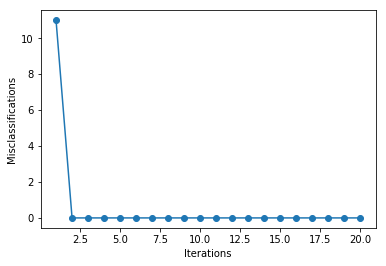

In [143]:
# Setosa = -1, 1 otherwise
sample = df.sample(100)
true_is = 'Iris-setosa'

y = np.where(sample['class'].values == true_is, 1, -1)

# sepal length and petal length
X = sample[['petal length in cm',
    'petal width in cm']].values

ppn = Perceptron(epochs=20, learning_rate=0.001, verbose=False)

ppn.train(X, y)

plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.xlabel('petal length in cm')
plt.ylabel('petal width in cm')
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

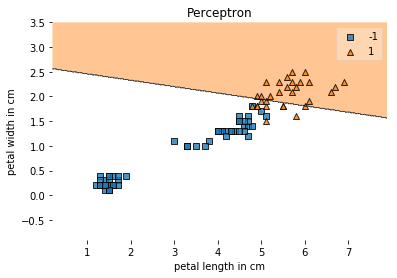

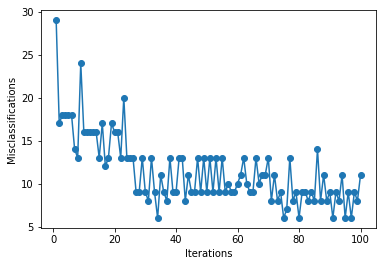

In [142]:
# Setosa = -1, 1 otherwise
sample = df.sample(100)
true_is = 'Iris-virginica'

y = np.where(sample['class'].values == true_is, 1, -1)

# sepal length and petal length
X = sample[['petal length in cm',
    'petal width in cm']].values

ppn = Perceptron(epochs=100, learning_rate=0.0001, verbose=False)

ppn.train(X, y)

plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.xlabel('petal length in cm')
plt.ylabel('petal width in cm')
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()